In [1]:
import plotly.express as px
import pandas as pd

# df = px.data.tips()
# fig = px.parallel_categories(df)

# fig.show()

In [2]:
df = pd.read_csv('./example.csv')
fig = px.parallel_categories(df)
fig.show()

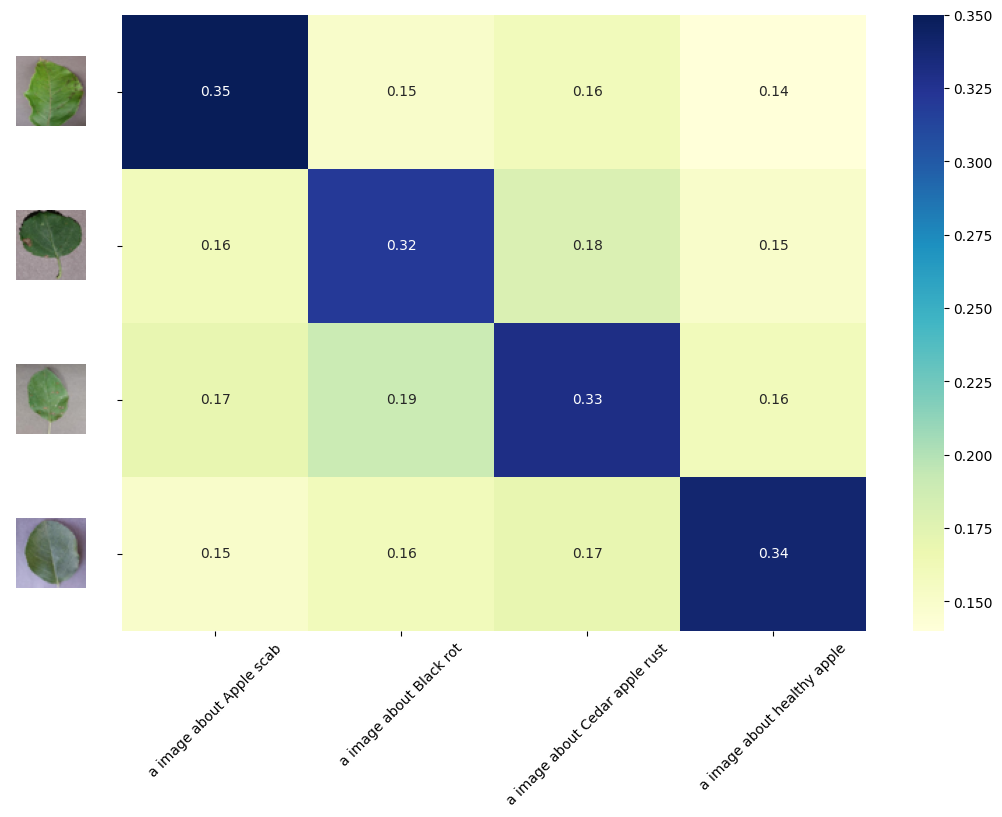

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Disease categories
text_labels = [
    "a image about Apple scab",
    "a image about Black rot",
    "a image about Cedar apple rust",
    "a image about healthy apple"
]

image_labels = [
    "./scab.png",
    "./black_rot.png",
    "./cedar_rust.png",
    "./healthy.png"
]

# Sample similarity matrix (replace with your CLIP model outputs)
similarities = np.array([
    [0.35, 0.15, 0.16, 0.14],
    [0.16, 0.32, 0.18, 0.15],
    [0.17, 0.19, 0.33, 0.16],
    [0.15, 0.16, 0.17, 0.34]
])

# Create heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(similarities, annot=True, xticklabels=text_labels, yticklabels=['']*len(image_labels), cmap="YlGnBu")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Load images
images = [Image.open(img_path) for img_path in image_labels]

# Display images next to y-axis
for y, img in enumerate(images):
    imagebox = OffsetImage(img.resize((50, 50)), zoom=1)
    y_pos = (len(images) - y - 0.5) / len(images)
    ab = AnnotationBbox(imagebox, (-0.05, y_pos), frameon=False, xycoords='axes fraction', box_alignment=(1, 0.5))
    ax.add_artist(ab)

plt.show()